In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import eipi10.ml.linear_model as lm
from eipi10.ml.planar_utils import *
from eipi10.ml.utils import *
from eipi10.ml.predictor import *

reload(lm)
%matplotlib inline

In [2]:
learning_rate = 1

epoch_times = 2000
print_num_epoch = 100
keep_cost_num_epoch = 100

level = logging.INFO
# level = logging.DEBUG
if level == logging.DEBUG:
    epoch_times = 150
    print_num_epoch = 1
    keep_cost_num_epoch = 1
logger.setLevel(level=level)

# One Variable Data

In [3]:
train_X_orig, train_Y_orig = load_flat_dataset("data/ex1data1.txt")


train_X = train_X_orig
train_Y = train_Y_orig
print(train_X.shape)
print(train_Y.shape)
model = lm.LinearRegression(num_features=train_X.shape[0],
                            optimizer=GradientOptimizer(0.01),
                            iterator=NumberIterator(1500))
model.fit(train_X, train_Y, print_cost=True, print_num_epoch=100)
print("cost={}".format(model.cost))
print("w={}".format(model.W))
print("b={}".format(model.b))

W, b = lm.LinearRegression.normal_equation(train_X, train_Y)
print('equation.W={}'.format(W))
print('equation.b={}'.format(b))


INFO: Cost after epoch 0: 32.0727338775


(1, 97)
(1, 97)


INFO: Cost after epoch 100: 5.4799755805
INFO: Cost after epoch 200: 5.1761529629
INFO: Cost after epoch 300: 4.9643620462
INFO: Cost after epoch 400: 4.8167252680
INFO: Cost after epoch 500: 4.7138095311
INFO: Cost after epoch 600: 4.6420682683
INFO: Cost after epoch 700: 4.5920583384
INFO: Cost after epoch 800: 4.5571970466
INFO: Cost after epoch 900: 4.5328956797
INFO: Cost after epoch 1000: 4.5159555031
INFO: Cost after epoch 1100: 4.5041467195
INFO: Cost after epoch 1200: 4.4959149654
INFO: Cost after epoch 1300: 4.4901767134
INFO: Cost after epoch 1400: 4.4861766502
INFO: Final Cost after epoch 1500: 4.4833882566


cost=4.483388256587726
w=[[ 1.16636235]]
b=[[-3.63029144]]
equation.W=[[ 1.19303364]]
equation.b=[[-3.89578088]]


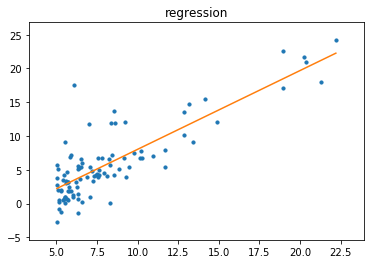

In [4]:
predictor = Predictor(model)
predictor.plot_regression_curve(train_X, train_Y)

(75, 1) (75,) (25, 1) (25,) 27.478050549563925 5


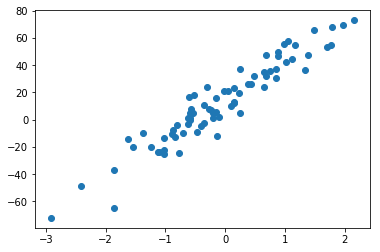

(1, 75) (1, 75) (1, 25) (1, 25) 27.478050549563925 5


In [7]:
train_X_orig, train_Y_orig, test_X_orig, test_Y_orig, w, b = load_regression_dataset_coef(n_samples=100, noise=10, bias=10)
print(train_X_orig.shape, train_Y_orig.shape, test_X_orig.shape, test_Y_orig.shape, w, b)

plt.scatter(train_X_orig, train_Y_orig)
plt.show()

train_X = train_X_orig.T
train_Y = train_Y_orig.reshape(train_Y_orig.shape[0], 1).T
test_X = test_X_orig.T
test_Y = test_Y_orig.reshape(test_Y_orig.shape[0], 1).T

print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape, w, b)

INFO: Cost after epoch 0: 539.4940294539
INFO: Cost after epoch 100: 43.0489108017
INFO: Cost after epoch 200: 43.0489108017
INFO: Cost after epoch 300: 43.0489108017
INFO: Cost after epoch 400: 43.0489108017
INFO: Cost after epoch 500: 43.0489108017
INFO: Cost after epoch 600: 43.0489108017
INFO: Cost after epoch 700: 43.0489108017
INFO: Cost after epoch 800: 43.0489108017
INFO: Cost after epoch 900: 43.0489108017
INFO: Cost after epoch 1000: 43.0489108017
INFO: Cost after epoch 1100: 43.0489108017
INFO: Cost after epoch 1200: 43.0489108017
INFO: Cost after epoch 1300: 43.0489108017
INFO: Cost after epoch 1400: 43.0489108017
INFO: Cost after epoch 1500: 43.0489108017
INFO: Cost after epoch 1600: 43.0489108017
INFO: Cost after epoch 1700: 43.0489108017
INFO: Cost after epoch 1800: 43.0489108017
INFO: Cost after epoch 1900: 43.0489108017
INFO: Final Cost after epoch 2000: 43.0489108017


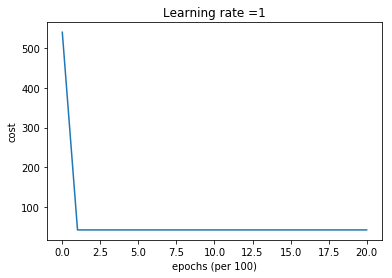

[[ 28.21157788]] [[ 14.5423416]]
equation.W=[[ 28.21157788]]
equation.b=[[ 14.5423416]]


In [8]:
reload(lm)
model = lm.LinearRegression(num_features=train_X.shape[0], 
                            regularizer=Regularizer(), iterator=NumberIterator(epoch_times), 
                            optimizer=GradientOptimizer(learning_rate), initializer=WeightInitializer(),
                            keep_cost_num_epoch=keep_cost_num_epoch)

model.fit(train_X, train_Y, print_cost=True, print_num_epoch=print_num_epoch)   

model.plot_costs()
print(model.W, model.b)

W, b = lm.LinearRegression.normal_equation(train_X, train_Y)
print('equation.W={}'.format(W))
print('equation.b={}'.format(b))

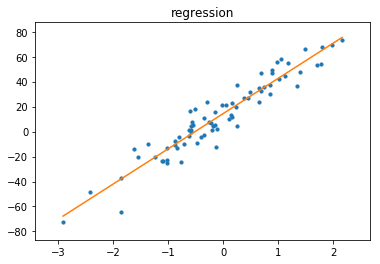

In [9]:
predictor = Predictor(model)
predictor.plot_regression_curve(train_X, train_Y)